In [133]:
import tensorflow as tf
import numpy as np

# 원본사진
# 1,3,3,1
# 이미지 개수 ,가로 ,세로 ,뎁스  

#즉 4차원 배열이됨

#image shape => (1,3,3,1)

image=np.array([
                [
                    [
                        [1],
                        [2],
                        [3]
                    ],
                    [
                        [4],
                        [5],
                        [6]
                    ],
                    [
                        [7],
                        [8],
                        [9]
                    ],
                 ]
                ], dtype=np.float32 )

# 필터는
# 2,2,1,1\
# 가로 ,세로 ,색상 ,필터개수

W=np.array([[ [[1,10,3]],[[1,10,3]] ],[[[1,10,3]],[[1,10,3]] ]] , dtype=np.float32)

print("image")
print(image.shape)
print("w.shape")
print(W.shape)
print("=====")
conv2d=tf.nn.conv2d(image,W ,strides=[1,1,1,1],padding="VALID"  ) #컨벌루션 결과 만들어내는것 첫
# 앞에가 움직이는 칸수? 맨뒤가 뎁스인듯?  가운데 두개가 스트라이트 가로 세로 크기고
print(conv2d.shape)
#컨벌루션 만들기
sess=tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(conv2d))
#렐루처리
sess.run(tf.global_variables_initializer())
conv2d2= tf.nn.relu(conv2d)

print(sess.run(conv2d2))


#conv2d=tf.layers.conv2d( inputs=image ,filters=32 , kernel_size=[2,2],padding="VALID",strides=1 )
#랜덤으로만들어진 필터 32개를 쓰겠다 , 커널사이즈 =>필터의 가로 세로



image
(1, 3, 3, 1)
w.shape
(2, 2, 1, 3)
=====
(1, 2, 2, 3)
[[[[ 12. 120.  36.]
   [ 16. 160.  48.]]

  [[ 24. 240.  72.]
   [ 28. 280.  84.]]]]
[[[[ 12. 120.  36.]
   [ 16. 160.  48.]]

  [[ 24. 240.  72.]
   [ 28. 280.  84.]]]]


In [138]:
import tensorflow as tf
import numpy as np

image=np.array([
                [
                    [
                        [1],
                        [2],
                        [3]
                    ],
                    [
                        [4],
                        [5],
                        [6]
                    ],
                    [
                        [7],
                        [8],
                        [9]
                    ],
                 ]
                ], dtype=np.float32 )



conv2d=tf.layers.conv2d(image ,filters=32 , kernel_size=[2,2],padding="VALID",strides=1,activation=tf.nn.relu )

sess=tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(conv2d)

AttributeError: 'tuple' object has no attribute 'ndims'

In [130]:
import tensorflow as tf
import numpy as np

image=np.array([[[[4],[3]],[[2],[1]]]])

print(image.shape)


pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],padding="SAME"  ) # 이미지.ksize=>가운데 두개가 커널사이즈

sess.run(pool)




(1, 2, 2, 1)


array([[[[4],
         [3]],

        [[2],
         [1]]]])

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
<tf.Variable 'Variable_13:0' shape=(3, 3, 1, 5) dtype=float32_ref>
[[[[ 0.564848    0.21784659 -0.05179293  1.0026104   0.6142582 ]]

  [[ 0.47037178 -2.000208    0.05126894 -0.01366385  0.0381602 ]]

  [[ 1.2183268  -0.02804831 -1.274778   -0.8446352   0.31649688]]]


 [[[-1.8669828  -1.5103611   1.1043017   0.516193   -0.82981503]]

  [[-0.3571028   0.74557096 -0.7620549   0.7729514  -0.4136966 ]]

  [[-1.6174588   0.44974217  1.5934393   0.8787012  -0.36248267]]]


 [[[ 0.7859718   0.18238261  0.4968576  -0.7630445   0.6595795 ]]

  [[ 0.62737596  0.23209378  1.4978089   0.2831002   1.0188973 ]]

  [[-0.25165033  0.58463234  0.20035347  1.4663912  -0.02353636]]]]
(1, 14, 14, 5)
(5, 14, 14, 1)


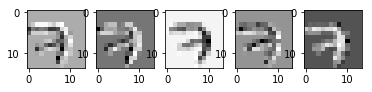

In [137]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt


##1 data loading

mnist = input_data.read_data_sets("./data/mnist", one_hot=True)
                                  
##2 처음 한장가지고 해보기

img=mnist.train.images[0]

#plt.imshow(img.reshape(28,28), cmap="Greys")
#plt.show()

#원본데이터의 형태부터 변경
img=tf.reshape(img,shape=[-1,28,28,1])


#필터를 정의 필터크기 (3,3)    ,   필터개수 5 ,     컬러와 매핑

W=tf.Variable(tf.random_normal([3,3,1,5]))

print(W)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(W))






conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1], padding="SAME") #스트라이드가 2칸씩뛰어서 same이어도 원본크기와 다르다

sess=tf.Session()
sess.run(tf.global_variables_initializer())
result=sess.run(conv2d)
print(result.shape) #즉1,14,14,5   14,14크기의  이미지가 5장


#배열의 형태를 원하는 축으로 바꿀수있음

#결과이미지를 출력해보기위해 데이터처리를 진행
#axes 변경 (5,14,14,1)
result = np.swapaxes(result,0,3)
print(result.shape)


fig, axes=plt.subplots(1,5) # 1행 5열짜리 그림 5개를 보여줄수있는 영역을 잡음 idx -> 0~4까지 돔 3차원의 데이터가 t_img

for idx,t_img in enumerate(result):
    axes[idx].imshow(t_img.reshape(14,14) , cmap="Greys")
    

#plt.show()

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
<tf.Variable 'Variable_16:0' shape=(3, 3, 1, 5) dtype=float32_ref>
[[[[ 0.70456785  1.5333397  -0.31133732 -0.9093865  -1.2263485 ]]

  [[ 0.7592716  -0.7934383  -0.33679467  0.11619866 -0.48332092]]

  [[-2.354685   -1.1978384  -0.9500589   0.9130684   1.5428164 ]]]


 [[[ 0.19052754 -0.55516255  0.08739493 -0.13432261  1.2451923 ]]

  [[ 0.5317349  -1.8491356  -1.0913033  -0.66508824 -0.7311274 ]]

  [[-1.1620284  -0.6636378  -0.34935746 -1.1681707  -0.93551135]]]


 [[[-1.2350953  -1.536322   -0.19770922  0.66953534 -0.05007719]]

  [[ 0.00294905  0.20925233 -0.05548407  0.15297288  0.17352991]]

  [[ 0.07570092 -1.2994522  -1.7848533   0.56283915 -1.0497148 ]]]]
(1, 7, 7, 5)
(5, 7, 7, 1)


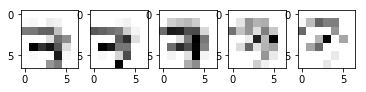

In [143]:
#사이즈 줄이기 풀링 순서는 빈도는 개발자 마음대로이고 정해진게 없다 대신 컨벌루션 렐루 는 같이해야함

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt


##1 data loading

mnist = input_data.read_data_sets("./data/mnist", one_hot=True)
                                  
##2 처음 한장가지고 해보기

img=mnist.train.images[0]

#plt.imshow(img.reshape(28,28), cmap="Greys")
#plt.show()

#원본데이터의 형태부터 변경
img=tf.reshape(img,shape=[-1,28,28,1])


#필터를 정의 필터크기 (3,3)    ,   필터개수 5 ,     컬러와 매핑

W=tf.Variable(tf.random_normal([3,3,1,5]))

print(W)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(W))






conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1], padding="SAME") #스트라이드가 2칸씩뛰어서 same이어도 원본크기와 다르다
conv2d = tf.nn.relu(conv2d)

pool = tf.nn.max_pool(conv2d , ksize=[1,2,2,1] , strides=[1,2,2,1], padding="SAME")



sess=tf.Session()
sess.run(tf.global_variables_initializer())
result=sess.run(pool)
print(result.shape) #즉1,14,14,5   14,14크기의  이미지가 5장


#배열의 형태를 원하는 축으로 바꿀수있음

#결과이미지를 출력해보기위해 데이터처리를 진행
#axes 변경 (5,14,14,1)
result = np.swapaxes(result,0,3)
print(result.shape)


fig, axes=plt.subplots(1,5) # 1행 5열짜리 그림 5개를 보여줄수있는 영역을 잡음 idx -> 0~4까지 돔 3차원의 데이터가 t_img

for idx,t_img in enumerate(result):
    axes[idx].imshow(t_img.reshape(7,7) , cmap="Greys")
    

#plt.show()

In [2]:
%time
#mnist with cnn

import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data   #패키지는 from

tf.reset_default_graph()  #충돌방지 텐서플로 그래프 초기화


#1 데이터불러오기
mnist = input_data.read_data_sets("./data/mnist", one_hot=True) 
#데이터가 없으면 (즉 전처리를 해준상태의 데이터) 자동으로 만들어줌 -> 편리하게 쓸수있도록 해줌

img=mnist.train.images
print(img.shape)
#2 데이터를 받아야함 , 입력을 받아야하거나할 때-> 플레이스 홀더
X=tf.placeholder(shape=[None,784], dtype=tf.float32)
Y=tf.placeholder(shape=[None,10], dtype=tf.float32)

keep_rate=tf.placeholder(dtype=tf.float32)  #드랍아웃에서 얼마나 살릴지

#3 convolution layer
#3.1 convolution layer
# 입력 데이터의 형태를 convolution 할수 있도록 4차배열로 reshape 그럼 입력데이터의 형태를 보는방법이 뭐였지?
# 들어오는 데이터 X의 shape = None,784
X_img = tf.reshape(X, shape=[-1,28,28,1])

print(X_img)

W1=tf.Variable(tf.random_normal([5,5,1,32],stddev=0.01))
#3.2 convolution layer

L1 = tf.nn.conv2d(X_img,W1,strides=[1,1,1,1], padding="SAME")
#RELU

L1 = tf.nn.relu(L1)

print(L1)
p1 = tf.nn.max_pool(L1 , ksize=[1,2,2,1] , strides=[1,2,2,1], padding="SAME")
print(p1)



#layer two 다른형태 위에꺼 복사해도됨
# W2=tf.Variable(tf.random_normal([5,5,1,32],stddev=0.01))
# L1 = tf.nn.conv2d(p1,W1,strides=[1,1,1,1], padding="SAME") 이런식으로


#filter,convolution,relu

L2=tf.layers.conv2d(inputs=p1, filters=64, kernel_size=[5,5] , padding="SAME", strides=1 ,activation=tf.nn.relu)



print("L2")
print(L2.shape)

L2=tf.layers.max_pooling2d(inputs=L2 , pool_size=[2,2], padding="SAME" , strides=2)

print(L2.shape)

#########CONVOLUTION LAYER 끝

#4. NURAL NETWORK

print("L2[0]")

print(L2)

L2=tf.reshape(L2,shape=[-1,7*7*64])

#print(L2.shape)

# 5. weight & bias

W2=tf.get_variable("weight2" , shape=[7*7*64,256], initializer=tf.contrib.layers.xavier_initializer())
b2=tf.Variable(tf.random_normal([256]),name="bias2" )

_layer1 = tf.nn.relu(tf.matmul(L2,W2)+b2 )
layer1 = tf.nn.dropout(_layer1 , keep_prob=keep_rate)


W3=tf.get_variable("weight3" , shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b3=tf.Variable(tf.random_normal([256]),name="bias3" )

_layer2 = tf.nn.relu(tf.matmul(layer1,W3)+b3 )
layer2 = tf.nn.dropout(_layer2 , keep_prob=keep_rate)


W4=tf.get_variable("weight4" , shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b4=tf.Variable(tf.random_normal([10]),name="bias4" )

# hypothesis 가설만들어야함


H = tf.matmul(layer2,W4)+b4

#cost 함수

cost= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=H , labels=Y))

train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습

num_of_epoch = 10
batch_size=100

print(mnist.train.num_examples)
batch_x,batch_y = mnist.train.next_batch(batch_size)

print(batch_y)


for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)
    for i in range(num_of_iter):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _,cost_val=sess.run([train,cost], feed_dict={X:batch_x , Y:batch_y ,keep_rate:0.5})

        
    print("cost : {}".format(cost_val))
    
    
    

predict = tf.argmax(H,1)
correct=tf.equal(predict , tf.argmax(Y,1)) 

accuracy=tf.reduce_sum(tf.cast(correct , dtype=tf.float32))

result_sum=0
num_of_iter = int(mnist.test.num_examples/batch_size)
for i in range(num_of_iter):
    batch_x,batch_y = mnist.test.next_batch(batch_size)
    correct_num=sess.run(accuracy, feed_dict={X:batch_x , Y:batch_y ,keep_rate:1})
    result_sum += correct_num
    
#tf.cast(correct , dtype=tf.float32# 맞으면 1 틀리면 0 100개를 끌어왔는데 반은맞고 반은 틀리면 50이됨 
#print("정확도:{}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels,keep_rate:1})) )

print("정확도:{}".format(result_sum/10000))





Wall time: 0 ns
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 784)
Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
L2
(?, 14, 14, 64)
(?, 7, 7, 64)
L2[0]
Tensor("max_pooling2d/MaxPool:0", shape=(?, 7, 7, 64), 